## 1. Загрузить файл hr.csv.

* satisfaction_level - уровень удовлетворенности работой
* last_evaluation - уровень последней оценки работы
* number_project -количество проектов
* average_montly_hours - среднее количество часов в месяц работы
* time_spend_company - шкала от 2 до 10, отражающее время работы в компании
* Work_accident - наличие инцидента на рабочем месте
* left - ушел ли работник или нет (1 будет - ушел, 0 - остался)
* promotion_last_5years - факт повышения в течение 5 лет
* sales - департамент работника
* salary - уровень зарплаты

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import seaborn as sns

In [65]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [66]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [67]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [68]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [69]:
corr_matrix = hr.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


C:\Users\Kabanov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kabanov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Kabanov\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


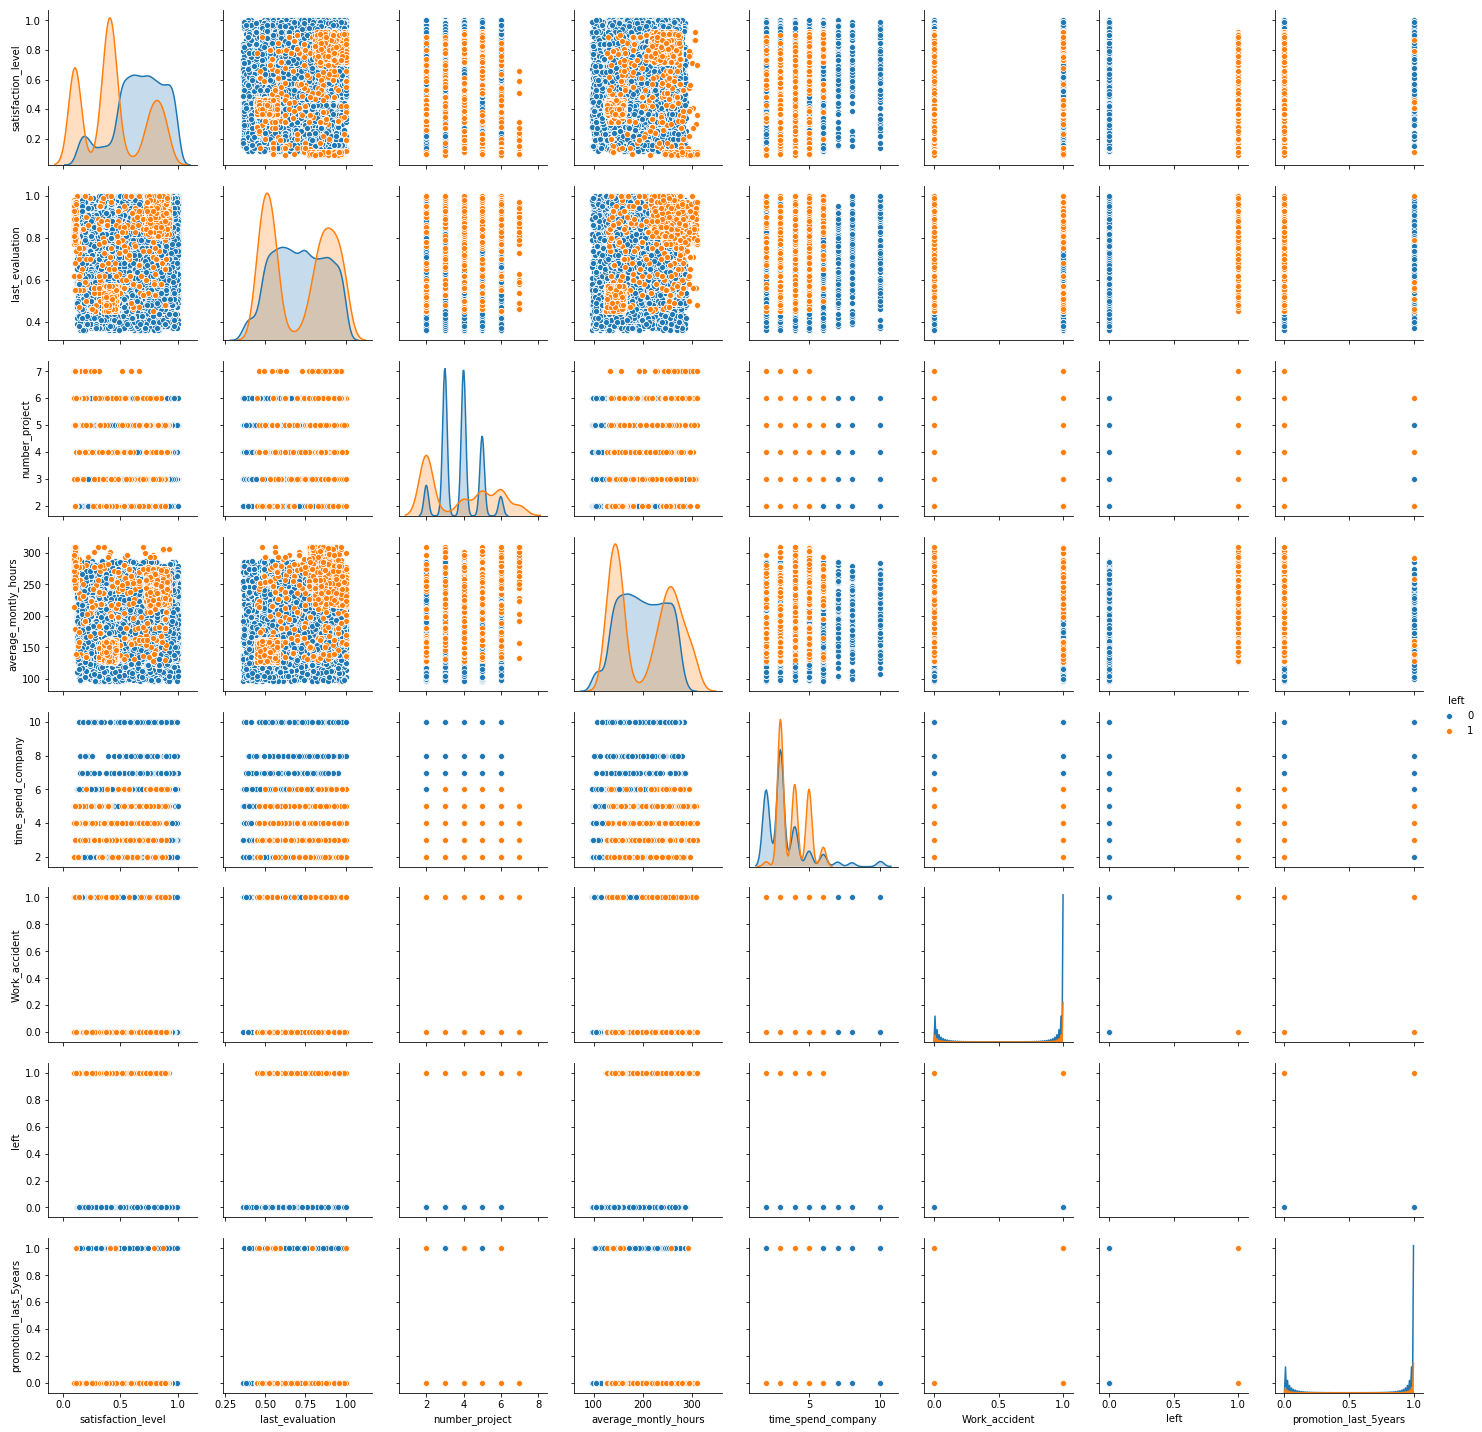

In [70]:
fig = sns.pairplot(hr, hue='left')
plt.show()

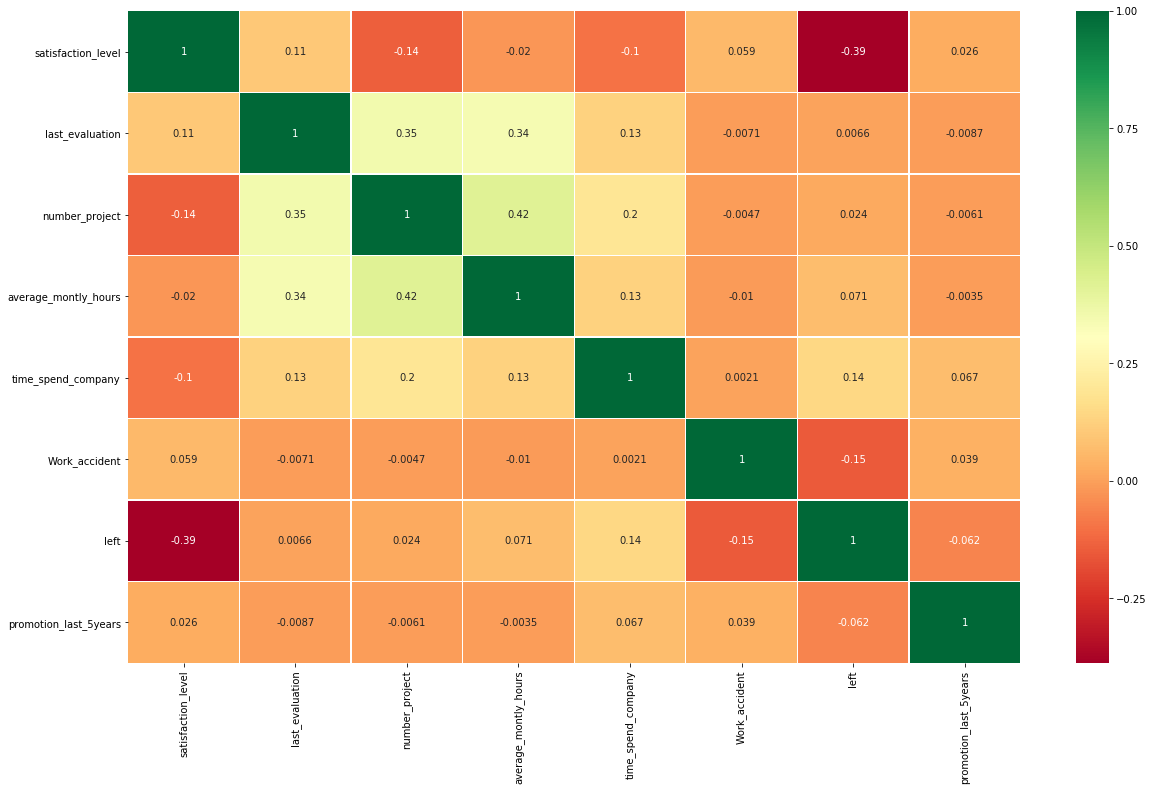

In [71]:
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Коэффициенты корреляции > 0,5 и < -0.5 отсутствуют, в целом корреляция выражена слабо. Наибольшие абсолютные значения корелляции между столбцами:
* Отрицательная:
    * satisfaction_level и left = -0,39
    * Work_accident и left = -0,15
    * satisfaction_level и number_project = -0,14
    * satisfaction_level и time_spend_company = -0,1
* Положительная:    
    * number_project и average_montly_hours = 0,42
    * number_project и last_evaluation = 0,35
    * last_evaluation и average_montly_hours = 0,34
    * time_spend_company и number_project = 0,2
    * time_spend_company и left = 0,14
    * time_spend_company и last_evaluation = 0,13
    * time_spend_company и average_montly_hours = 0,13
    * satisfaction_level и last_evaluation = 0,11

In [72]:
#Столбцы с категорийными данными sales и salary можно заменить на вектора (one-hot encoding) для сравнения этих значений
hr_new = pd.get_dummies(hr, columns = ["sales","salary"],
                             prefix=["sales","salary"])

hr_new.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [73]:
hr_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


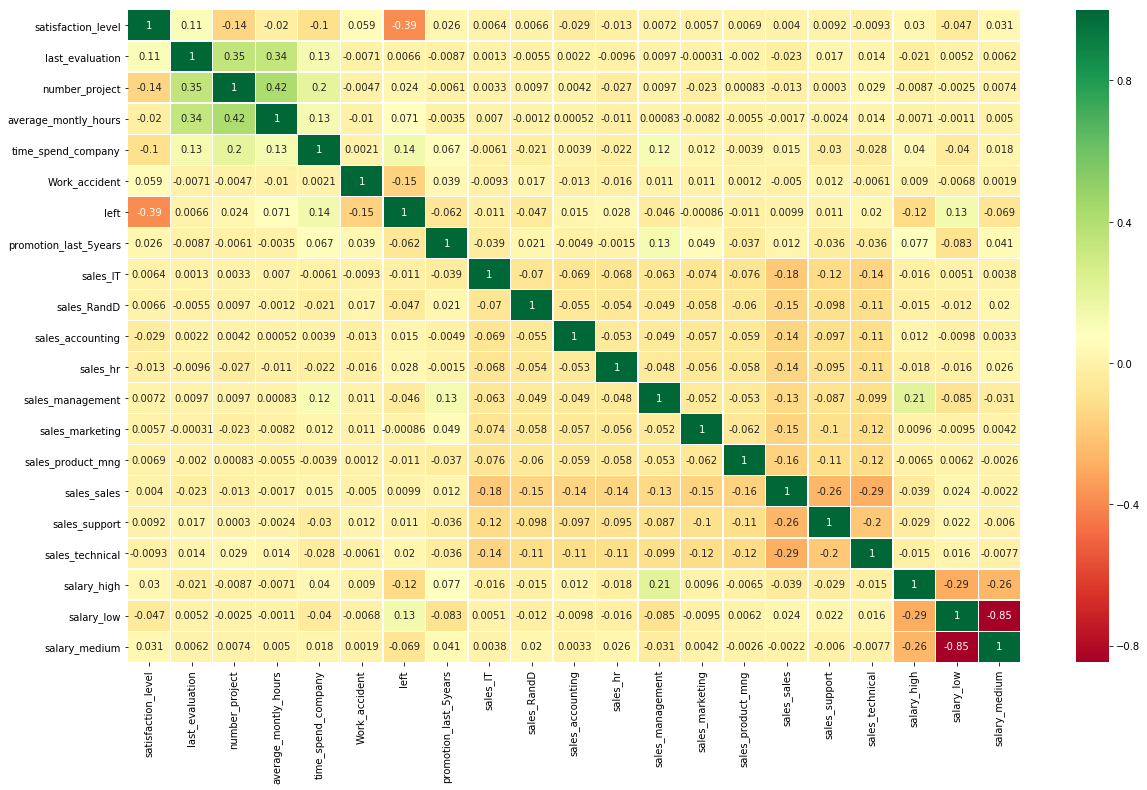

In [74]:
sns.heatmap(hr_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

## 4.Визуализировать несколько взаимосвязей между переменными.

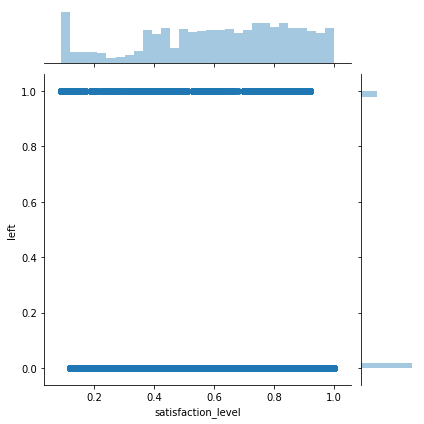

In [75]:
sns.jointplot(x='satisfaction_level', y='left', 
              data=hr, kind='scatter')

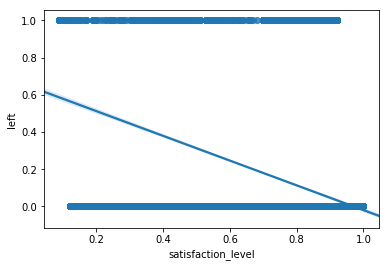

In [76]:
sns.regplot(x='satisfaction_level', y='left', 
              data=hr, fit_reg=True)

Графики показывают, что сотрудники с высоким satisfaction_level (>0.9) практически не увольняются, в целом чем ниже satisfaction_level, тем больше вероятность ухода.

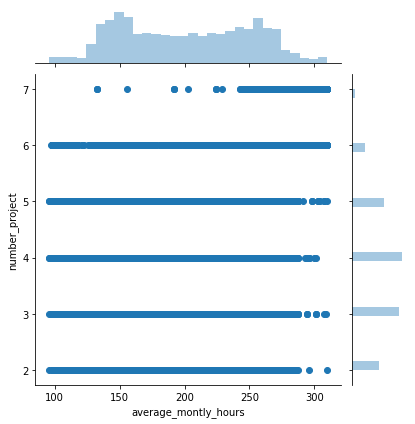

In [77]:
sns.jointplot(x='average_montly_hours', y='number_project', 
              data=hr, kind='scatter')

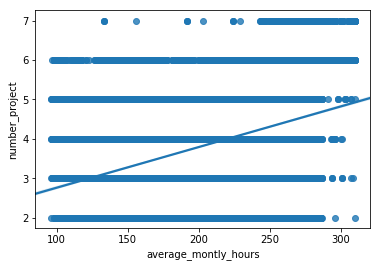

In [78]:
sns.regplot(x='average_montly_hours', y='number_project', 
              data=hr, fit_reg=True)

Графики подтверждают, что чем больше количество проектов, тем больше среднее количество часов работы в месяц. Есть положительная корреляция между данными.

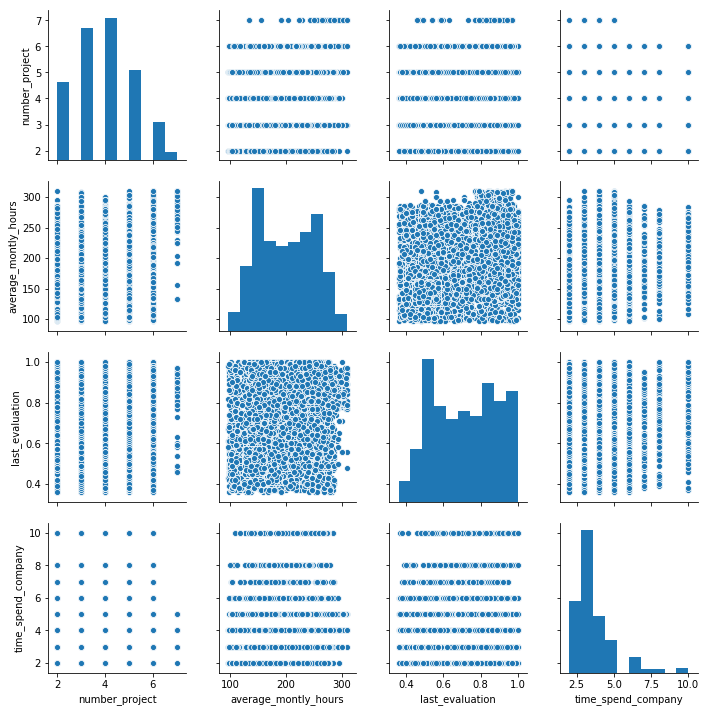

In [79]:
sns.pairplot(hr, vars=['number_project', 'average_montly_hours', 'last_evaluation', 'time_spend_company'], kind='scatter')

График показывает, что даже для данных с наибольшими коэффициентами корреляции линейные зависимости не выражены.

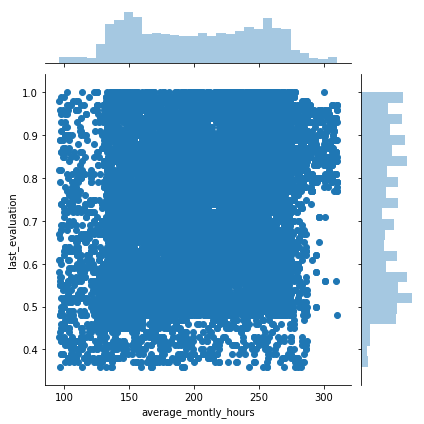

In [80]:
sns.jointplot(x='average_montly_hours', y='last_evaluation', 
              data=hr, kind='scatter')

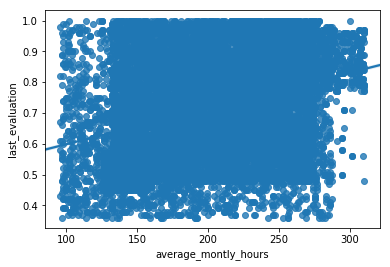

In [81]:
sns.regplot(x='average_montly_hours', y='last_evaluation', 
              data=hr, fit_reg=True)

Графики иллюстрируют наличие положительной корреляции между average_montly_hours и last_evaluation.

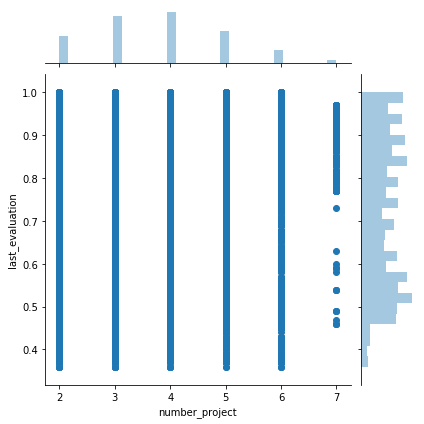

In [82]:
sns.jointplot(x='number_project', y='last_evaluation', 
              data=hr, kind='scatter')

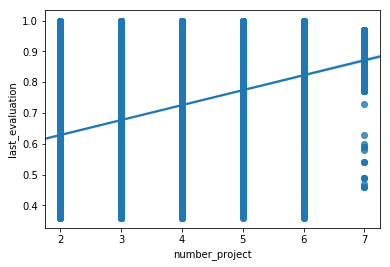

In [83]:
sns.regplot(x='number_project', y='last_evaluation', 
              data=hr, fit_reg=True)

Графики иллюстрируют наличие положительной корреляции между number_project и last_evaluation. Наибольшее количество проектов ведут сотрудники с более высокой оценкой.

## 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Гипотеза 1: работники с низкой и высокой зп увольняются одинаково

In [84]:
left_low_salary=hr.loc[hr['salary']=='low', 'left']
left_high_salary=hr.loc[hr['salary']=='high', 'left']
H1 = sts.ttest_ind(left_low_salary, left_high_salary)
print(H1)
H1[1]<0.05

Ttest_indResult(statistic=17.32020815712862, pvalue=4.4069322497175903e-66)


True

Гипотеза 1 отвергается, т.к. pvalue < 0.05. Работники с низкой и высокой зп увольняются не одинаково.

Гипотеза 2: у работников с низкой и высокой зп уровень удовлетворенности одинаковый

In [85]:
satisf_low_salary=hr.loc[hr['salary']=='low', 'satisfaction_level']
satisf_high_salary=hr.loc[hr['salary']=='high', 'satisfaction_level']
H2 = sts.ttest_ind(satisf_low_salary, satisf_high_salary)
print(H2)
H2[1]<0.05

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)


True

Гипотеза 2 отвергается, т.к. pvalue < 0.05, у работников с низкой и высокой зп средние уровни удовлетворенности не совпадают.

Гипотеза 3: у работников с низкой и высокой зп одинаковое количество проектов

In [86]:
project_low_salary=hr.loc[hr['salary']=='low', 'number_project']
project_high_salary=hr.loc[hr['salary']=='high', 'number_project']
H3 = sts.ttest_ind(project_low_salary, project_high_salary)
print(H3)
H3[1]<0.05

Ttest_indResult(statistic=0.8473615354719396, pvalue=0.3968173527404072)


False

Гипотезу 3 нельзя отвергнуть, т.к. pvalue > 0.05. У работников с низкой и высокой зп среднее количество проектов приблизительно одинаково. 

Гипотеза 4: уровень удовлетворенности работников одинаковый вне зависимости от факта повышения в течение 5 лет

In [87]:
satisf_promo=hr.loc[hr['promotion_last_5years']==1, 'satisfaction_level']
satisf_no_promo=hr.loc[hr['promotion_last_5years']==0, 'satisfaction_level']
H4 = sts.ttest_ind(satisf_promo, satisf_no_promo)
print(H4)
H4[1]<0.05

Ttest_indResult(statistic=3.1366967917856816, pvalue=0.0017119316267238923)


True

Гипотеза 4 отвергается, т.к. pvalue < 0.05. Уровень удовлетворенности работников зависит от факта повышения в течение 5 лет

Гипотеза 5: наличие инцидента на рабочем месте не зависит от среднего количества часов в месяц работы

In [88]:
accident_montly_hours=hr.loc[hr['Work_accident']==1, 'average_montly_hours']
no_accident_no_montly_hours=hr.loc[hr['Work_accident']==0, 'average_montly_hours']
H5= sts.ttest_ind(accident_montly_hours, no_accident_no_montly_hours)
print(H5)
H5[1]<0.05

Ttest_indResult(statistic=-1.2421846964457004, pvalue=0.21418784880707778)


False

Гипотезу 5 нельзя отвергнуть, т.к. pvalue > 0.05. Наличие инцидента на рабочем месте не зависит от среднего количества часов в месяц работы. 

## 6. Рассчитать сколько работников работает в каждом департаменте.

In [89]:
hr.groupby('sales').count().head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sales,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [90]:
hr['sales'].value_counts().head(10)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

## 7. Показать распределение сотрудников по зарплатам.

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


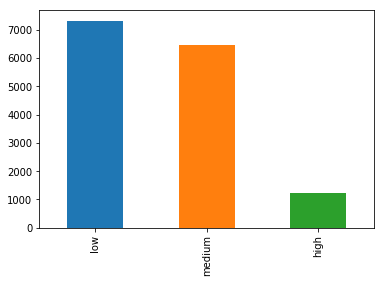

In [91]:
hr_salary = hr['salary'].value_counts().head()
print(hr_salary)
hr_salary.plot(kind='bar')

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [92]:
hr_salary_sales = hr.pivot_table(index = 'salary', columns = 'sales', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
hr_salary_sales

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


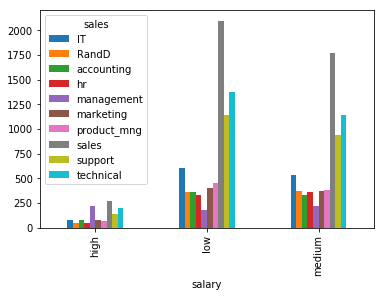

In [93]:
hr_salary_sales.plot(kind='bar')

In [94]:
hr_salary_sales1 = hr.pivot_table(index = 'sales', columns = 'salary', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
hr_salary_sales1

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


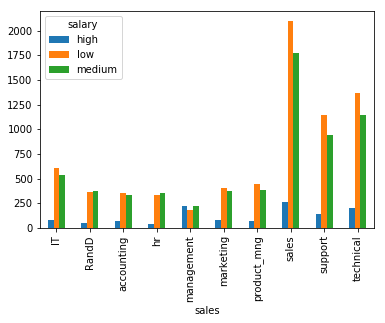

In [95]:
hr_salary_sales1.plot(kind='bar')

Наибольшее количество сотрудников в департаменте sales. Доля сотрудников с высокой зп больше всего у management.

## 9. Сколько сотрудников покинули компанию.

In [96]:
hr['left'].value_counts().head()

0    11428
1     3571
Name: left, dtype: int64

Компанию покинули 3571 чел.

## 10. Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

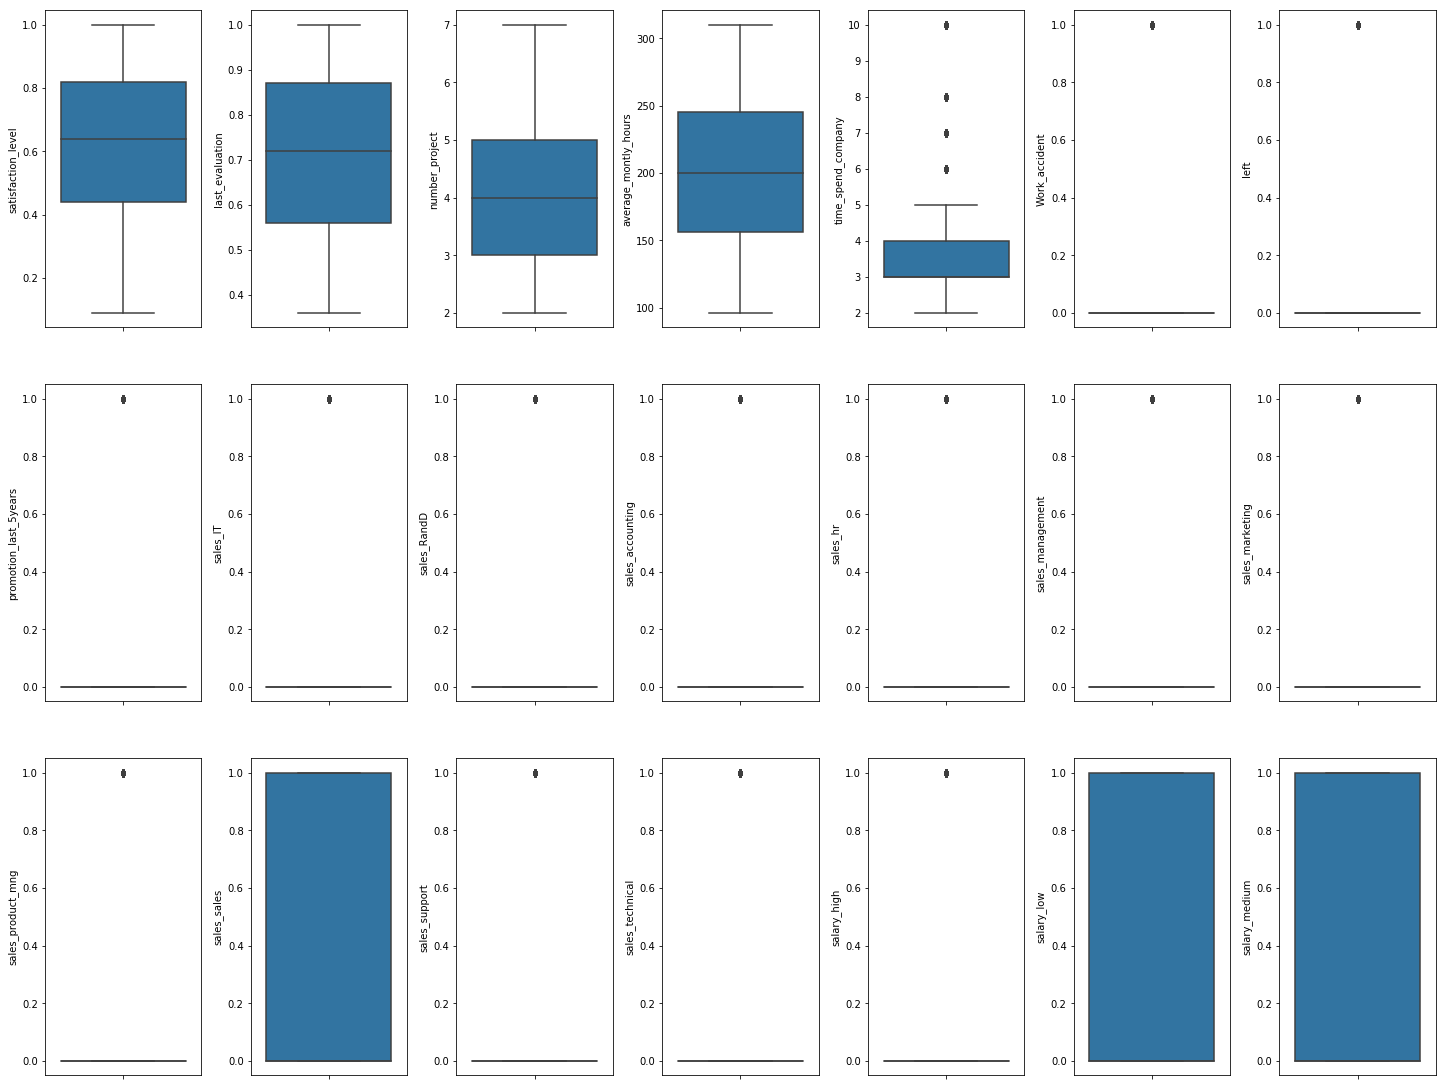

In [97]:
#Посмотрим выбросы в данных с помощью boxplot
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in hr_new.items():
    sns.boxplot(y=k, data=hr_new, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [98]:
#Посмотрим процент выбросов в данных
for k, v in hr_new.items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(hr)[0]
        print("Выбросы колонки %s = %.2f%%" % (k, perc))

Выбросы колонки satisfaction_level = 0.00%
Выбросы колонки last_evaluation = 0.00%
Выбросы колонки number_project = 0.00%
Выбросы колонки average_montly_hours = 0.00%
Выбросы колонки time_spend_company = 8.55%
Выбросы колонки Work_accident = 100.00%
Выбросы колонки left = 100.00%
Выбросы колонки promotion_last_5years = 100.00%
Выбросы колонки sales_IT = 100.00%
Выбросы колонки sales_RandD = 100.00%
Выбросы колонки sales_accounting = 100.00%
Выбросы колонки sales_hr = 100.00%
Выбросы колонки sales_management = 100.00%
Выбросы колонки sales_marketing = 100.00%
Выбросы колонки sales_product_mng = 100.00%
Выбросы колонки sales_sales = 0.00%
Выбросы колонки sales_support = 100.00%
Выбросы колонки sales_technical = 100.00%
Выбросы колонки salary_high = 100.00%
Выбросы колонки salary_low = 0.00%
Выбросы колонки salary_medium = 0.00%


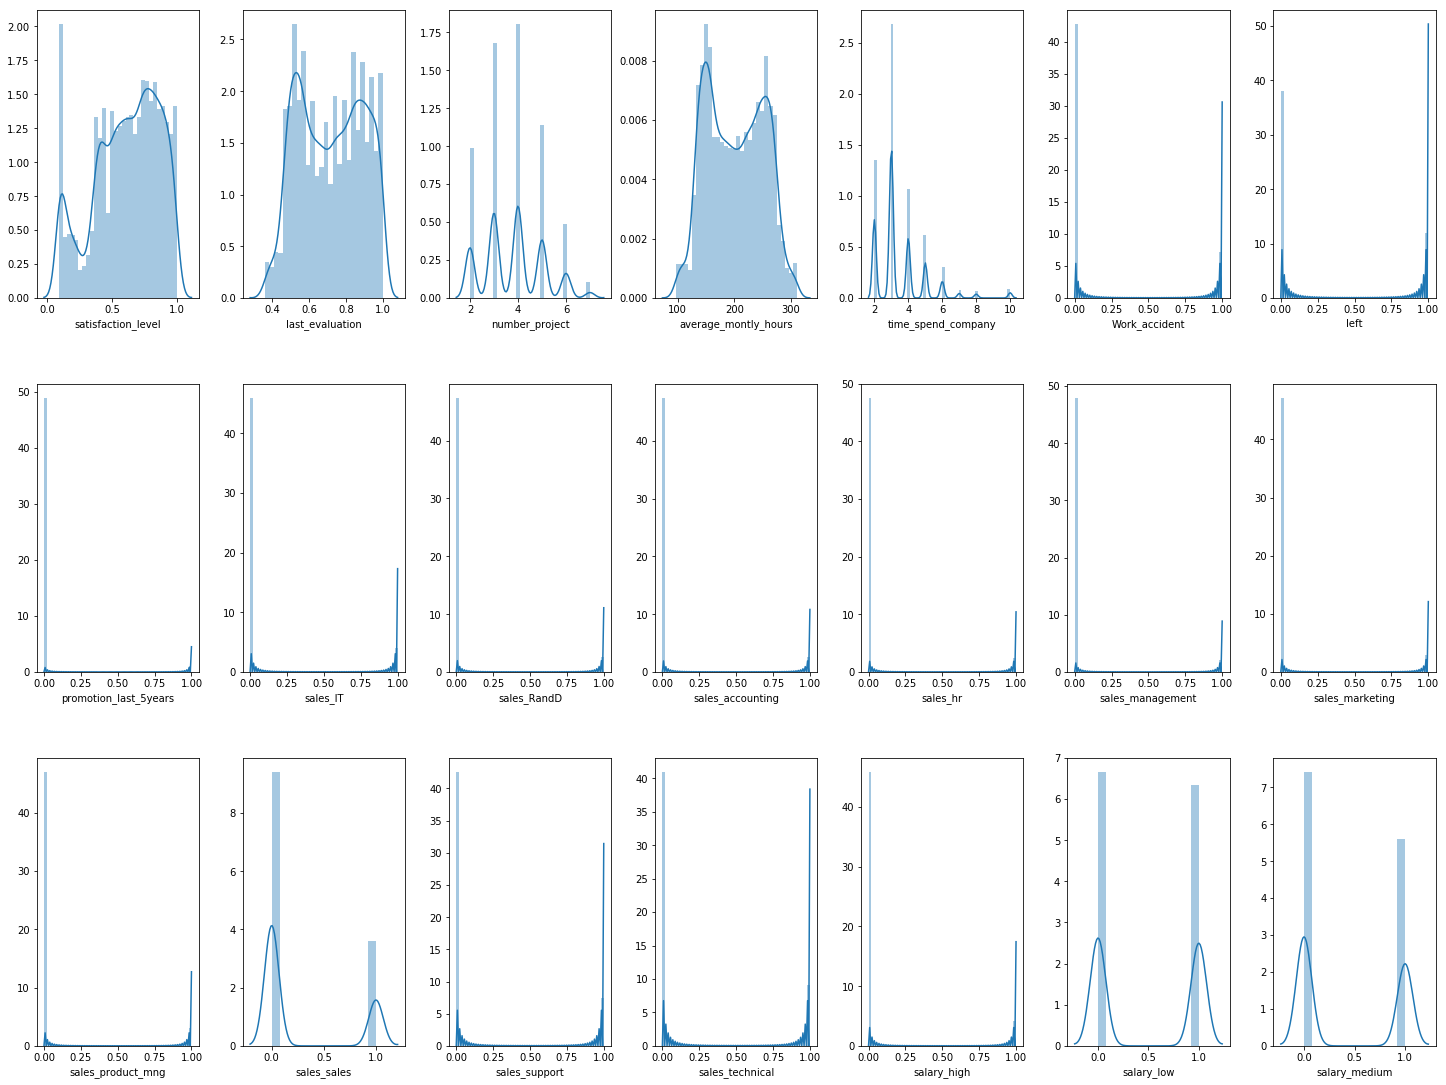

In [99]:
#Посмотрим плотности распределения значений
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in hr_new.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Гипотеза 1: сотрудники уходят из-за низкого уровня удовлетворенности. 

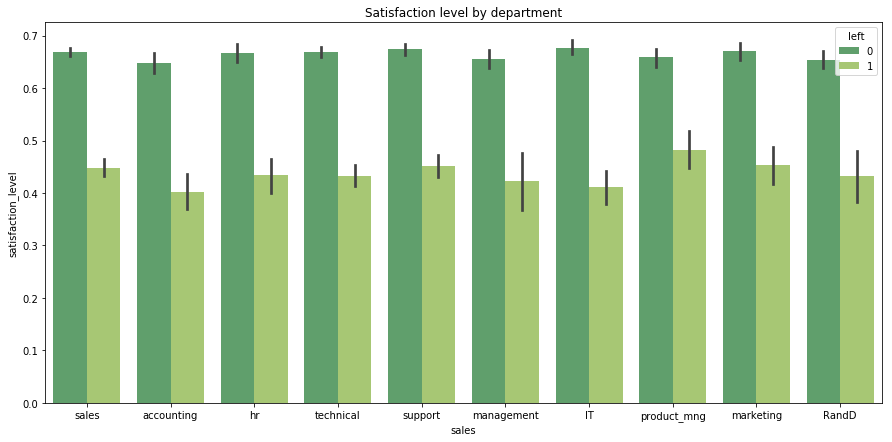

In [100]:
#Посмотрим распределение тех, кто уволился, по отделам и уровню удовлетворенности
plt.figure(figsize=(15,7))
plt.subplot(1, 1, 1)
sns.barplot(x='sales',y='satisfaction_level',data=hr,hue='left',palette='summer')
plt.title('Satisfaction level by department')
plt.show()

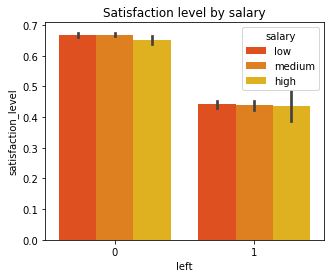

In [101]:
#Посмотрим распределение тех, кто уволился, по зп и уровню удовлетворенности
plt.figure(figsize=(5,4))
plt.subplot(1, 1, 1)
sns.barplot(x='left',y='satisfaction_level',data=hr,hue='salary',palette='autumn')
plt.title('Satisfaction level by salary')
plt.show()

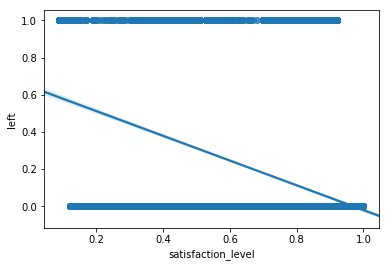

In [102]:
sns.regplot(x='satisfaction_level', y='left', data=hr, fit_reg=True)

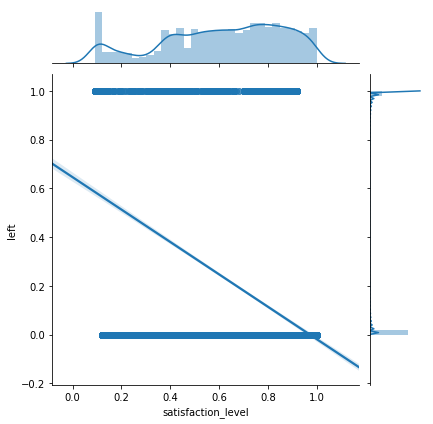

In [103]:
sns.jointplot(x='satisfaction_level', y='left', 
              data=hr, kind='reg')

Гипотеза 1: при увеличении уровля удовлетворенности вероятность ухода уменьшается, при максимальных уровнях удовлетворенности сотрудники не увольняются. Вне зависимости от уровня зп и отдела уходят сотрудники с меньшим уровнем удовлетворенности.

Гипотеза 2: сотрудники уходят после несчастных случаев. 

In [108]:
#рассчитаем условную вероятность ухода при наступлении инцидента
hr.groupby('Work_accident')['left'].value_counts()/hr.groupby('Work_accident')['left'].count()

Work_accident  left
0              0       0.734840
               1       0.265160
1              0       0.922084
               1       0.077916
Name: left, dtype: float64

Гипотеза 2: наоборот, вероятность уйти в случае инцидента меньше, чем при его отсутствии. Это также подтверждает слабая отрицательная корреляция -0,15 между Work_accident и left

Гипотеза 3: сотрудники уходят из-за большого количества проектов и времени работы.

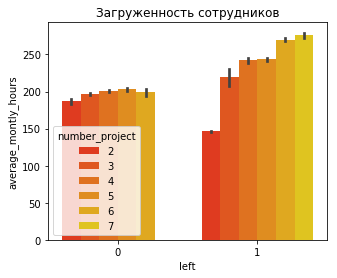

In [105]:
#Посмотрим распределение тех, кто уволился, по загруженности
plt.figure(figsize=(5,4))
plt.subplot(1, 1, 1)
sns.barplot(x='left',y='average_montly_hours',data=hr,hue='number_project',palette='autumn')
plt.title('Загруженность сотрудников')
plt.show()

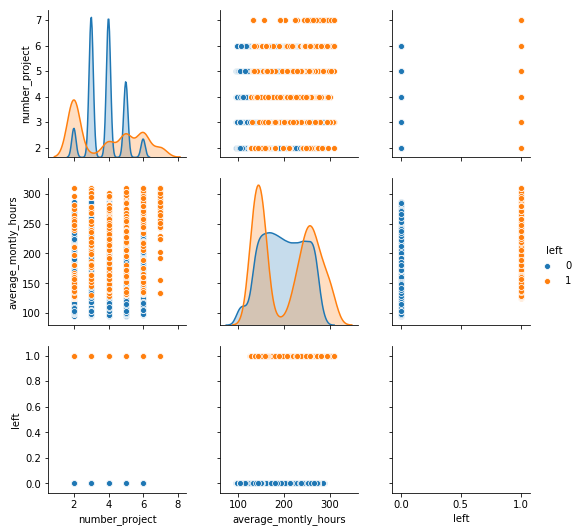

In [106]:
sns.pairplot(hr, vars=['number_project', 'average_montly_hours', 'left'], kind='scatter', hue='left')

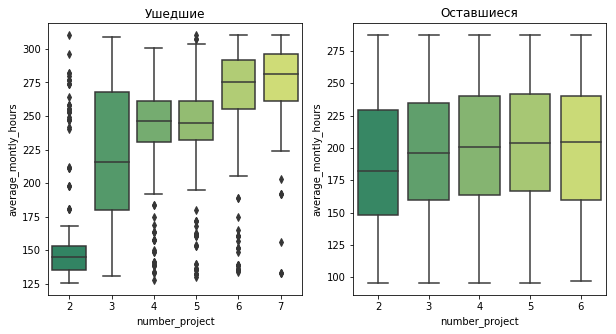

In [107]:
hr_left = hr[hr['left']==1] 

hr_no_left = hr[hr['left']==0]

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='number_project',y='average_montly_hours',data=hr_left,palette='summer')
plt.title('Ушедшие')
plt.subplot(1, 2, 2)
sns.boxplot(x='number_project',y='average_montly_hours',data=hr_no_left, palette='summer')
plt.title('Оставшиеся')

plt.show()


Гипотеза 3: визуализация показывает, что сотрудники уходят из-за большого количества проектов и времени работы. Оставшиеся имеют более равномерную и среднюю нагрузку.

Гипотеза 4: сотрудники уходят после того, как долго проработали в компании

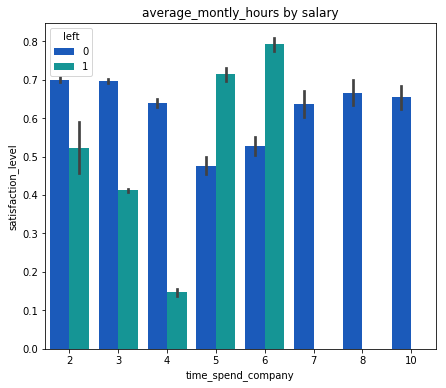

In [47]:
#Посмотрим распределение тех, кто уволился, в зависимости от времени работы в компании
plt.figure(figsize=(7,6))
plt.subplot(1, 1, 1)
sns.barplot(x='time_spend_company',y='satisfaction_level',data=hr,hue='left',palette='winter')

plt.show()

In [109]:
#рассчитаем условную вероятность ухода в зависимости от time_spend_company
hr.groupby('time_spend_company')['left'].value_counts()/hr.groupby('time_spend_company')['left'].count()

time_spend_company  left
2                   0       0.983662
                    1       0.016338
3                   0       0.753841
                    1       0.246159
4                   0       0.651936
                    1       0.348064
5                   1       0.565513
                    0       0.434487
6                   0       0.708914
                    1       0.291086
7                   0       1.000000
8                   0       1.000000
10                  0       1.000000
Name: left, dtype: float64

Гипотеза 4: наоборот, после определенного срока работы в компании вероятность увольнения снижается. Либо данные неполные.

11.Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте